In [ ]:
!pip install datasets
!pip install huggingface_hub

In [ ]:
from huggingface_hub import login
from datasets import load_dataset
from huggingface_hub import hf_hub_download

import zipfile
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
login(token="")
# !huggingface-cli login

# Download and Prepare Data

In [ ]:
# List of all files you want to download from Hugging Face
files_to_download = [
    "data/emo3d_data.parquet",
    "data/train_data.csv",
    "data/val_data.csv",
    "data/test_data.csv",
    "data/anger_images.zip",
    "data/contempt_images.zip",
    "data/disgust_images.zip",
    "data/fear_images.zip",
    "data/sadness_images.zip",
    "data/prompt1_images_0_1000.zip",
    "data/prompt1_images_1000_2000.zip",
    "data/prompt1_images_2000_3000.zip",
    "data/prompt1_images_3000_4000.zip",
    "data/prompt1_images_4000_5000.zip",
    "data/prompt1_images_5000_6000.zip",
    "data/prompt1_images_6000_7000.zip",
    "data/prompt1_images_7000_9000.zip",
    "data/prompt1_images_9000_10000.zip",
    "data/prompt2_images_0_1000.zip",
    "data/prompt2_images_1000_2000.zip",
    "data/prompt2_images_2000_3000.zip",
    "data/prompt2_images_3000_4000.zip",
    "data/prompt2_images_4000_5000.zip",
    "data/prompt2_images_5000_6000.zip",
    "data/primitive_emotions.csv",
    "data/primitive_emotions.zip"
]


# dataset = load_dataset("llm-lab/Emo3D")

repo_id = "llm-lab/Emo3D"
local_dir = "/content"
# Download all files
for file_path in files_to_download:
    print(f"Downloading {file_path}...")
    hf_hub_download(repo_type='dataset', repo_id=repo_id, filename=file_path, local_dir=local_dir)
    print(f"{file_path} downloaded successfully.")

In [ ]:
for file_path in files_to_download:
    local_file_path = os.path.join(local_dir, file_path)  # Full path to the file
    print(local_file_path)
    if file_path.endswith(".zip"):  # Check if it's a zip file
        print(f"Unzipping {file_path}...")

        unzip_dir = file_path[:-4]
        with zipfile.ZipFile(local_file_path, 'r') as zip_ref:
            zip_ref.extractall(unzip_dir)  # Extract to the same directory
        os.remove(local_file_path)
        print(f"{file_path} extracted successfully.")

# Data Sample

In [7]:
df = pd.read_parquet('data/emo3d_data.parquet')
df.head()

,sample_id,prompt_type,text_1,text_2,text_3,neutral,happiness,surprise,sadness,anger,...,fear,contempt,img_1,img_2,img_3,img_4,blenshape_score_1,blenshape_score_2,blenshape_score_3,blenshape_score_4
0,0,prompt1,This elderly female is showing intense despair...,This woman in her old age looks disheartened.,The expression of this elderly lady reflects a...,0.2,0.0,0.0,0.9,0.0,...,0.0,0.1,prompt1_images_0_1000/0_0.jpeg,prompt1_images_0_1000/0_1.jpeg,prompt1_images_0_1000/0_2.jpeg,prompt1_images_0_1000/0_3.jpeg,[0. 0.271 0.191 0.165 0.001 0.002 0. 0. ...,[0. 0.013 0.014 0.324 0.067 0.05 0. 0. ...,None,[0. 0.372 0.299 0.018 0.007 0.009 0. 0. ...
1,1,prompt1,A young male with a bemused expression on his ...,The face of a young man with a look of surpris...,A young man with a slightly stunned expression...,0.7,0.2,0.1,0.0,0.0,...,0.0,0.1,prompt1_images_0_1000/1_0.jpeg,prompt1_images_0_1000/1_1.jpeg,prompt1_images_0_1000/1_2.jpeg,None,[0. 0.013 0.02 0.066 0.263 0.116 0. 0. ...,[0. 0. 0. 0.778 0.621 0.452 0. 0. ...,[0. 0.02 0.013 0.055 0.172 0.13 0. 0. ...,None
2,2,prompt1,A elderly female showcasing a gleeful expressi...,The elderly woman had a look of joyfulness pai...,The visage of the senior lady was illuminated ...,0.2,0.8,0.1,0.0,0.0,...,0.0,0.0,prompt1_images_0_1000/2_0.jpeg,prompt1_images_0_1000/2_1.jpeg,prompt1_images_0_1000/2_2.jpeg,prompt1_images_0_1000/2_3.jpeg,[0. 0.232 0.203 0.001 0.063 0.034 0.002 0. ...,[0. 0.011 0.007 0.023 0.284 0.287 0.001 0. ...,[0. 0.245 0.223 0.002 0.023 0.017 0.001 0. ...,[0. 0.036 0.028 0.103 0.035 0.031 0.001 0. ...
3,3,prompt1,The female elderly face showed a peculiar look...,An expression of distress was evident on the w...,An elderly woman's face displayed a distressed...,0.5,0.0,0.2,0.7,0.2,...,0.4,0.0,prompt1_images_0_1000/3_0.jpeg,prompt1_images_0_1000/3_1.jpeg,prompt1_images_0_1000/3_2.jpeg,prompt1_images_0_1000/3_3.jpeg,[0. 0.104 0.132 0.345 0.004 0.003 0. 0. ...,[0. 0.161 0.047 0.29 0.005 0.033 0. 0. ...,[0. 0.024 0.017 0.235 0.125 0.116 0. 0. ...,[0. 0.002 0.003 0.746 0.255 0.152 0. 0. ...
4,4,prompt1,The thirty-something woman had a look of shock...,The female in her thirties had an expression o...,The face of a thirty-something woman showed a ...,0.2,0.0,0.8,0.0,0.0,...,0.2,0.0,prompt1_images_0_1000/4_0.jpeg,prompt1_images_0_1000/4_1.jpeg,prompt1_images_0_1000/4_2.jpeg,prompt1_images_0_1000/4_3.jpeg,[0. 0.001 0.001 0.767 0.67 0.462 0. 0. ...,[0. 0. 0. 0.609 0.666 0.548 0. 0. ...,[0. 0.001 0. 0.349 0.576 0.491 0. 0. ...,[0. 0.001 0. 0.386 0.636 0.793 0. 0. ...


In [ ]:
i = 0
text = df["text_1"][i]
image_path = os.path.join("/content/data", df["img_1"][i])
bs_scores = df["blenshape_score_1"][i]

blendshapes_names = ['_neutral', 'browDownLeft', 'browDownRight', 'browInnerUp', 'browOuterUpLeft', 'browOuterUpRight', 'cheekPuff',
 'cheekSquintLeft', 'cheekSquintRight', 'eyeBlinkLeft', 'eyeBlinkRight', 'eyeLookDownLeft', 'eyeLookDownRight', 'eyeLookInLeft',
 'eyeLookInRight', 'eyeLookOutLeft', 'eyeLookOutRight', 'eyeLookUpLeft', 'eyeLookUpRight', 'eyeSquintLeft', 'eyeSquintRight',
 'eyeWideLeft', 'eyeWideRight', 'jawForward', 'jawLeft', 'jawOpen', 'jawRight', 'mouthClose', 'mouthDimpleLeft', 'mouthDimpleRight',
 'mouthFrownLeft', 'mouthFrownRight', 'mouthFunnel', 'mouthLeft', 'mouthLowerDownLeft', 'mouthLowerDownRight', 'mouthPressLeft',
 'mouthPressRight', 'mouthPucker', 'mouthRight', 'mouthRollLower', 'mouthRollUpper', 'mouthShrugLower', 'mouthShrugUpper', 'mouthSmileLeft',
 'mouthSmileRight', 'mouthStretchLeft', 'mouthStretchRight', 'mouthUpperUpLeft', 'mouthUpperUpRight', 'noseSneerLeft', 'noseSneerRight']

bs_arr = np.array(bs_scores.strip("[]").split(), dtype=float)
bs_dict = {}
for j in range(len(blendshapes_names)):
    bs_dict[blendshapes_names[j]] = float(bs_arr[j])

Emotion Description:  This elderly female is showing intense despair in her face.


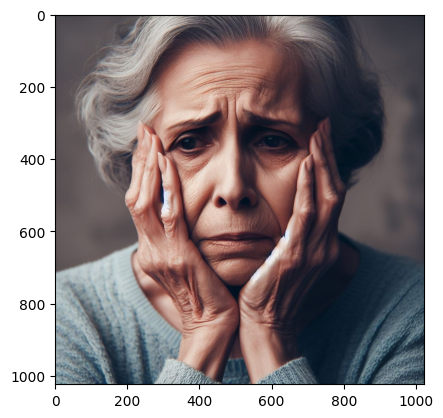

Blend Shape Scores: 


{'_neutral': 0.0,
 'browDownLeft': 0.271,
 'browDownRight': 0.191,
 'browInnerUp': 0.165,
 'browOuterUpLeft': 0.001,
 'browOuterUpRight': 0.002,
 'cheekPuff': 0.0,
 'cheekSquintLeft': 0.0,
 'cheekSquintRight': 0.0,
 'eyeBlinkLeft': 0.078,
 'eyeBlinkRight': 0.057,
 'eyeLookDownLeft': 0.029,
 'eyeLookDownRight': 0.039,
 'eyeLookInLeft': 0.187,
 'eyeLookInRight': 0.013,
 'eyeLookOutLeft': 0.028,
 'eyeLookOutRight': 0.242,
 'eyeLookUpLeft': 0.283,
 'eyeLookUpRight': 0.245,
 'eyeSquintLeft': 0.578,
 'eyeSquintRight': 0.209,
 'eyeWideLeft': 0.011,
 'eyeWideRight': 0.009,
 'jawForward': 0.0,
 'jawLeft': 0.012,
 'jawOpen': 0.038,
 'jawRight': 0.0,
 'mouthClose': 0.009,
 'mouthDimpleLeft': 0.004,
 'mouthDimpleRight': 0.0,
 'mouthFrownLeft': 0.001,
 'mouthFrownRight': 0.002,
 'mouthFunnel': 0.002,
 'mouthLeft': 0.009,
 'mouthLowerDownLeft': 0.001,
 'mouthLowerDownRight': 0.001,
 'mouthPressLeft': 0.008,
 'mouthPressRight': 0.002,
 'mouthPucker': 0.672,
 'mouthRight': 0.0,
 'mouthRollLower': 0.39

In [31]:
print("Emotion Description: ", text)
img = mpimg.imread(image_path)
imgplot = plt.imshow(img)
plt.show()
print("Blend Shape Scores: ")
bs_dict